<a href="https://colab.research.google.com/github/maxwellfundi/dataengineering-course-24/blob/main/Final_work_Njiru_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Faker package - a Python package that allows you to generate fake data

In [ ]:
# Installing Faker

!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.8 MB/s eta 0:00:00


Use faker to generate fake data with 2000 rows and export it to Excel

In [ ]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker instance
fake = Faker()

# Define list of products
products = ['Onions', 'Potatoes', 'Tomatoes', 'Bananas', 'Apples']

# Generate data for 2000 random individuals
individuals = []
for _ in range(2000):
    name = fake.name()
    city = fake.city()
    country = fake.country()
    sex = random.choice(['Male', 'Female'])
    age = random.randint(18, 80)
    feedback_count = random.randint(1, len(products))
    feedback = [fake.text(max_nb_chars=200) for _ in range(feedback_count)]
    individuals.append((name, city, country, sex, age, feedback))

# Generate net revenue for each product feedback
def generate_net_revenue():
    if random.random() < 0.05:
        return random.randint(10000, 50000)  # Outlier
    else:
        return random.randint(100, 10000)

# Create DataFrame
columns = ['Name', 'City', 'Country', 'Sex', 'Age', 'Feedback', 'Product', 'Net Revenue', 'Date']
data = []
for individual in individuals:
    name, city, country, sex, age, feedback = individual
    for prod in random.sample(products, len(feedback)):
        net_revenue = generate_net_revenue()
        data.append((name, city, country, sex, age, feedback.pop(), prod, net_revenue, fake.date_this_decade()))

df = pd.DataFrame(data, columns=columns)

# Save to Excel file
output_file = 'Final_work_Njiru.xlsx'
df.to_excel(output_file, index=False)

print(f"Generated data saved to {output_file}.")

Generated data saved to Final_work_Njiru.xlsx.


Carrying out descriptive statistics


In [ ]:
#Imports and loading data

import pandas as pd
df = pd.read_excel('Final_work_Njiru.xlsx')

In [ ]:
#descriptive statistics
df.describe()

Age   Net Revenue                           Date
count  6040.000000   6040.000000                           6040
mean     49.223675   6099.989901  2022-05-22 22:39:10.728476928
min      18.000000    101.000000            2020-01-01 00:00:00
25%      34.000000   2756.750000            2021-03-12 18:00:00
50%      50.000000   5332.000000            2022-05-11 00:00:00
75%      64.000000   7826.500000            2023-08-05 00:00:00
max      80.000000  49852.000000            2024-10-15 00:00:00
std      18.153267   6108.391636                            NaN

In [ ]:
descriptive_stats = df.describe(include='all')
descriptive_stats.to_excel('descriptive_stats.xlsx', sheet_name='Statistics')

Working on associations

In [ ]:
#install sweetviz -Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis)
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 88.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


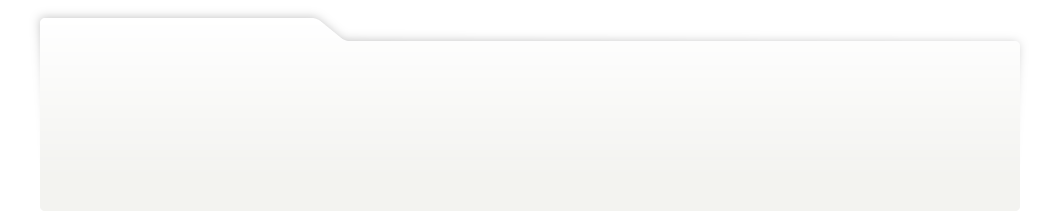
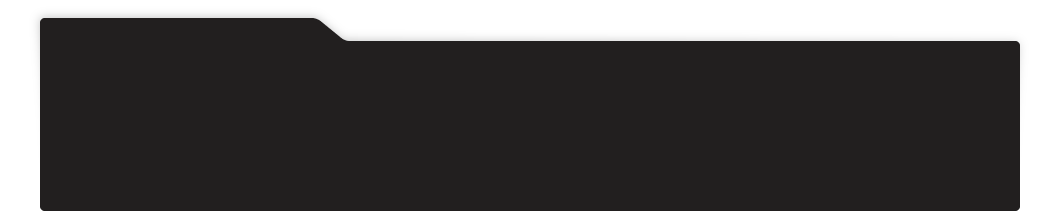
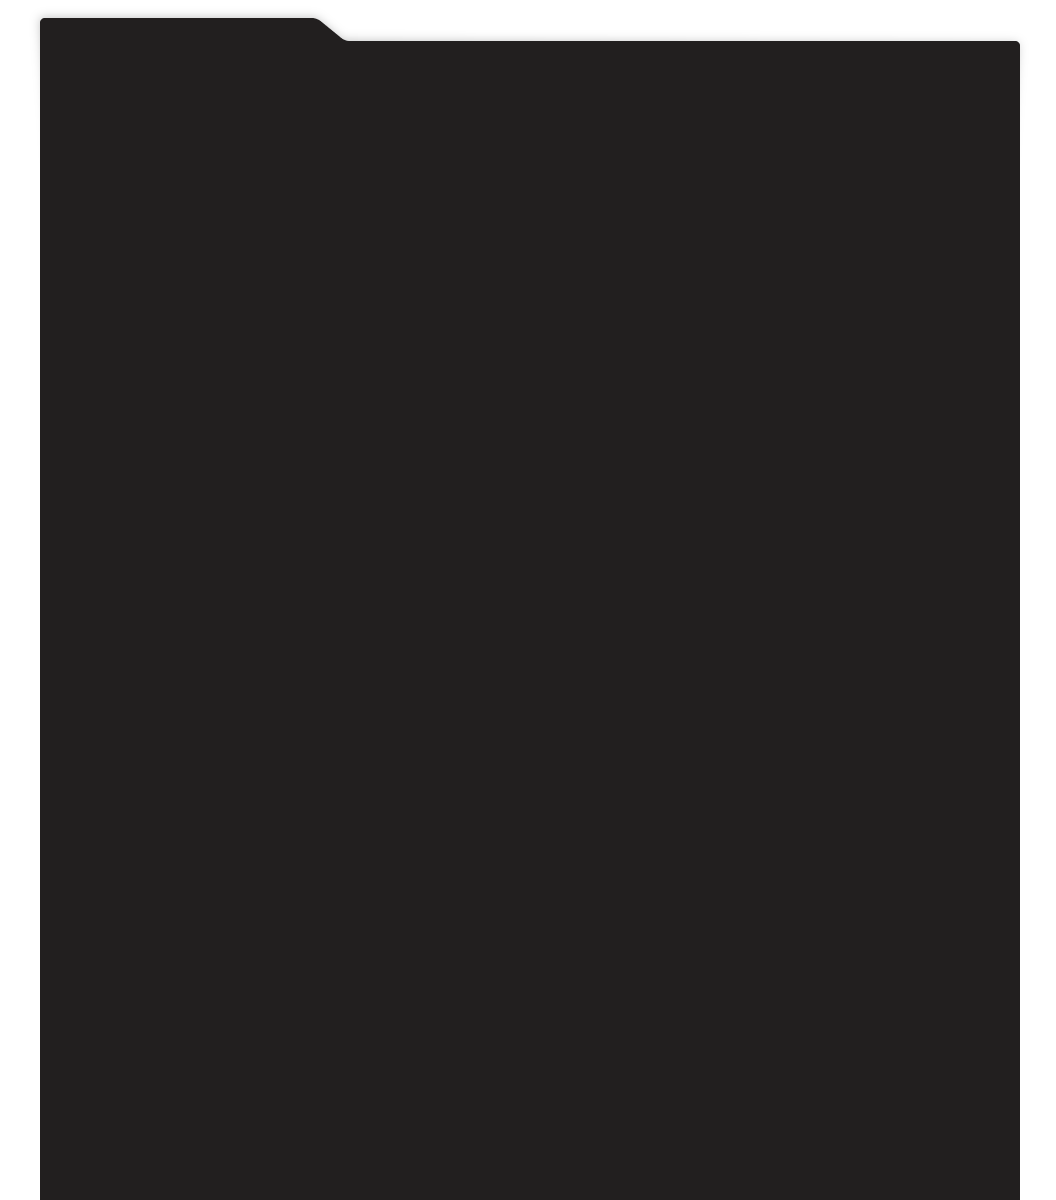
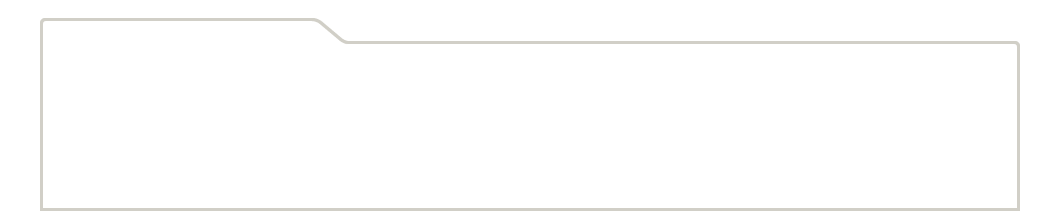
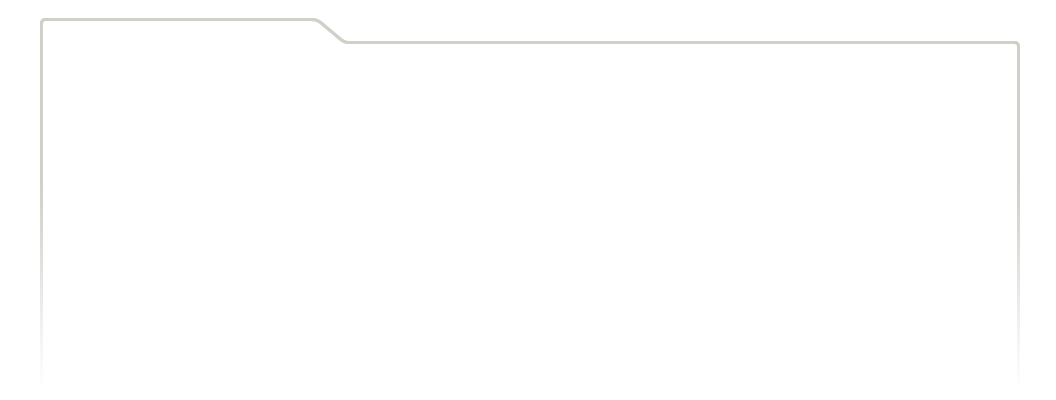
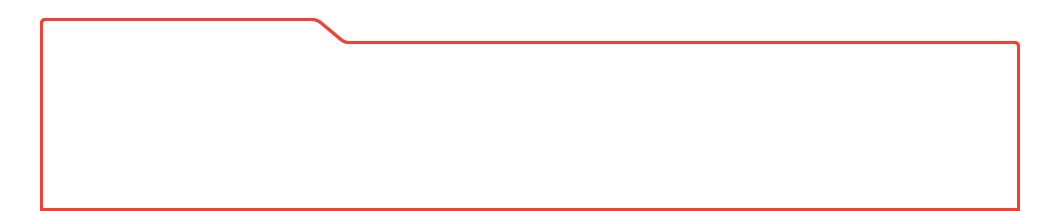
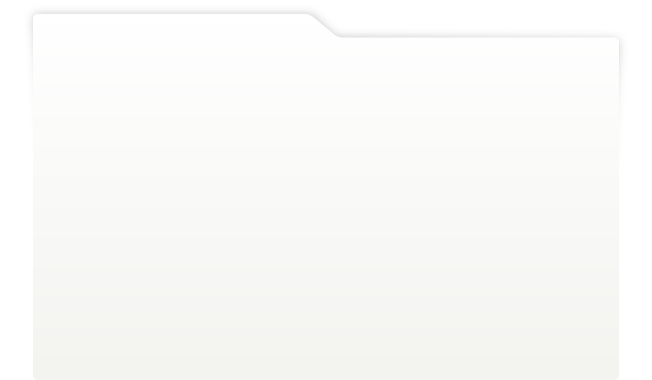
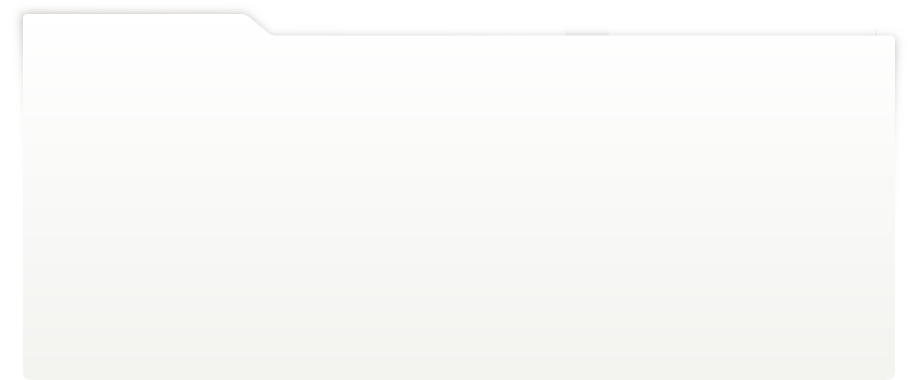
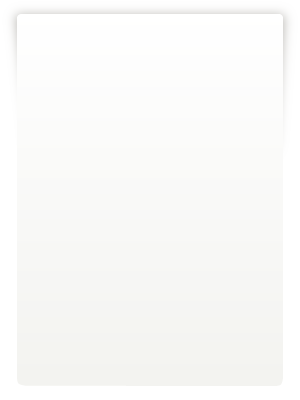
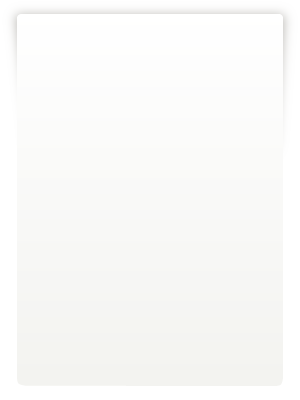
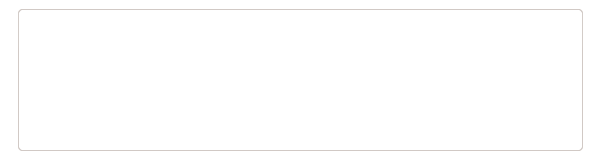
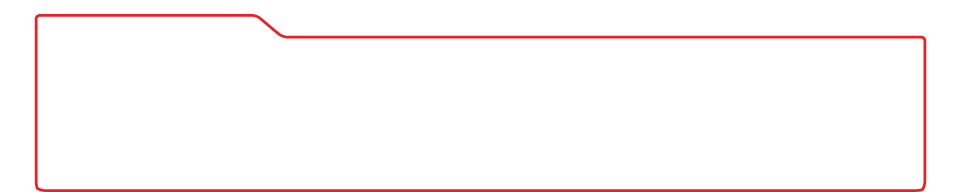
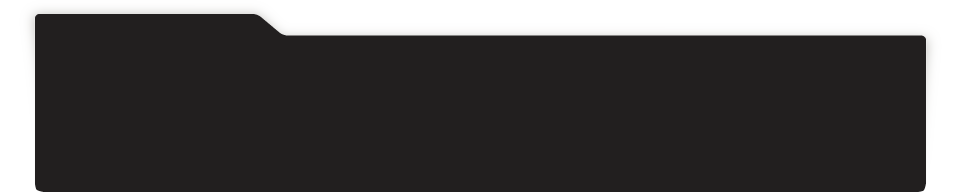
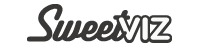
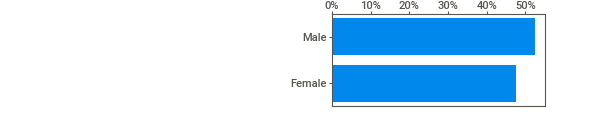
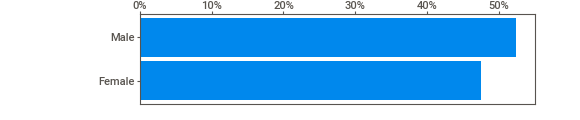
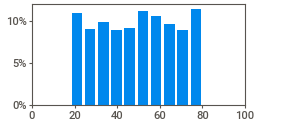
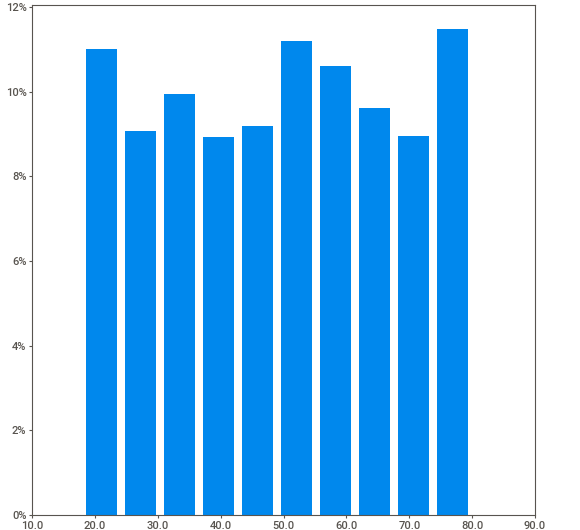
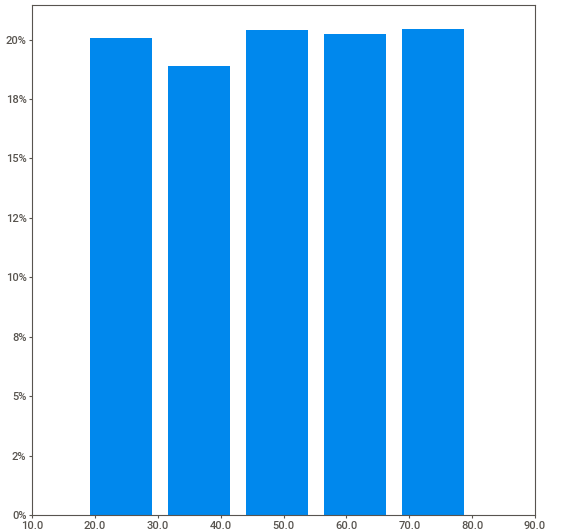
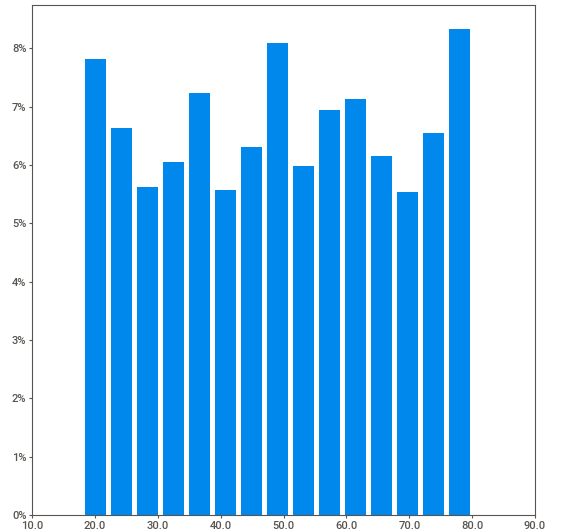
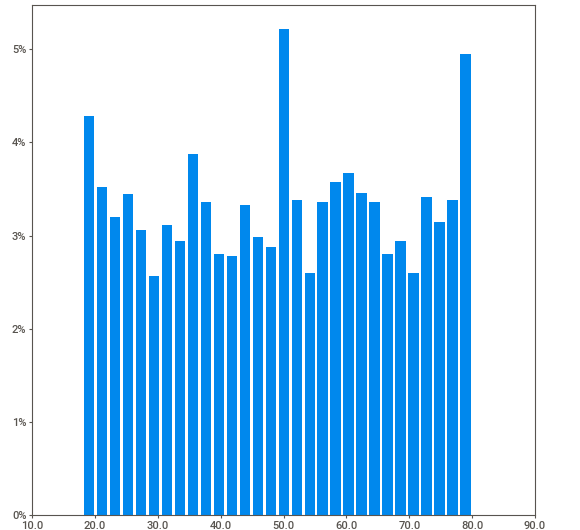
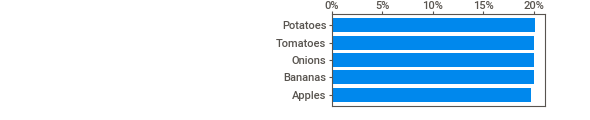
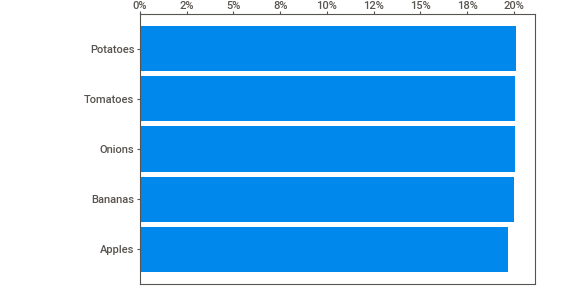
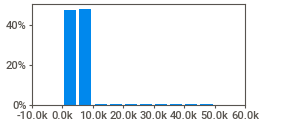
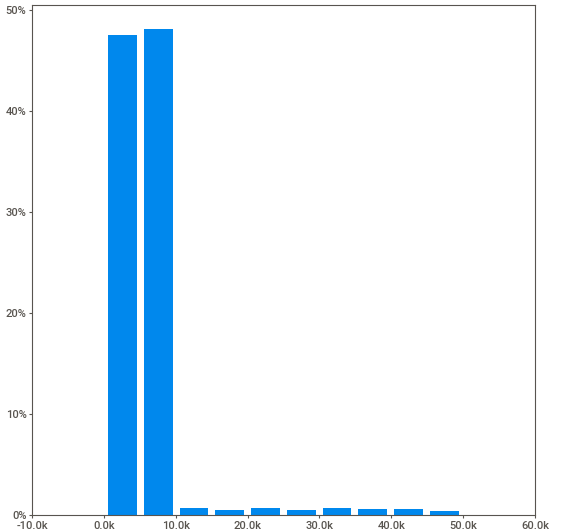
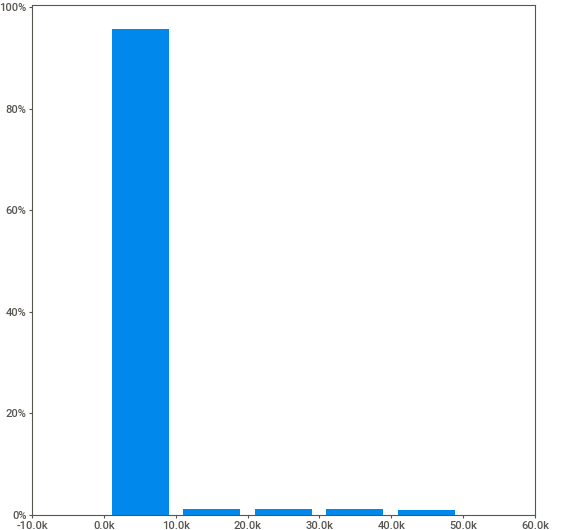
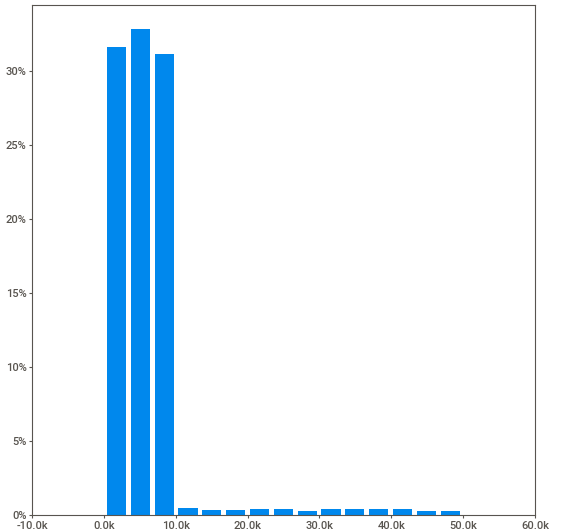
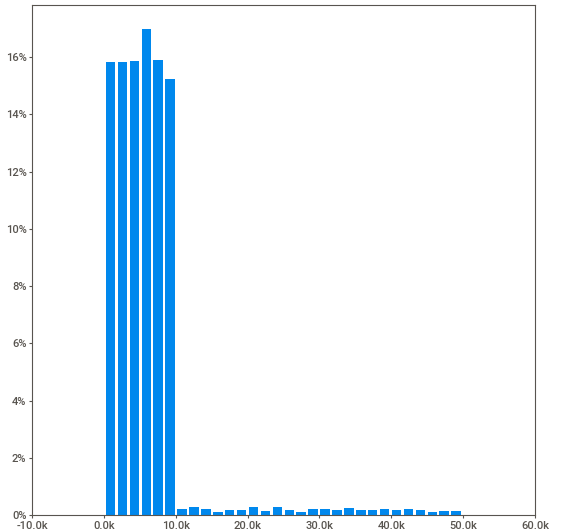
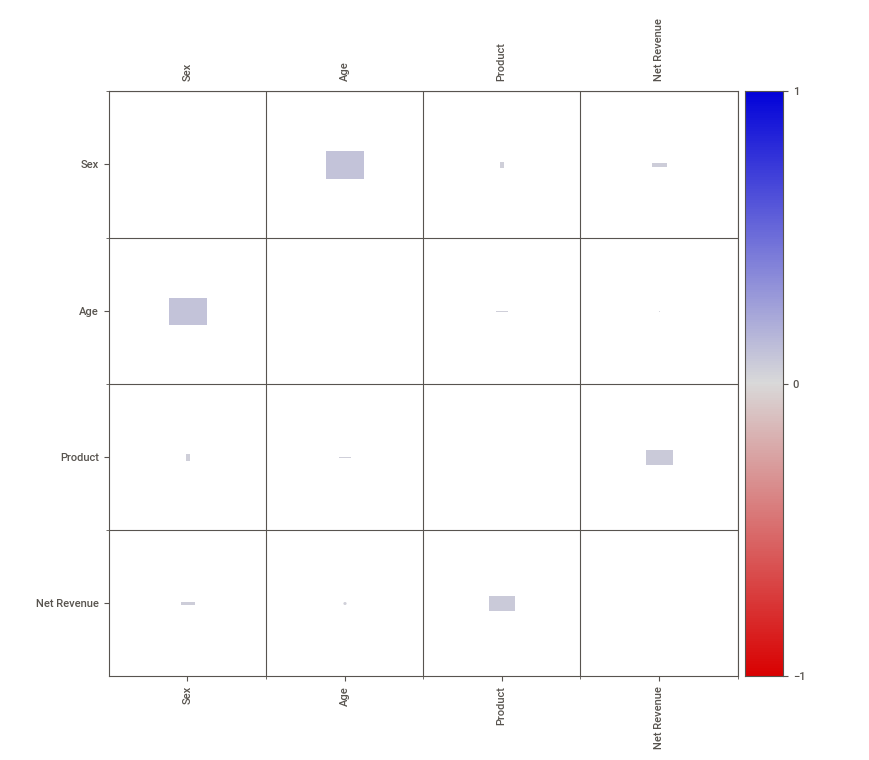
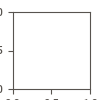

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()
report.show_html('sweetviz_report.html')

generate a boxplot

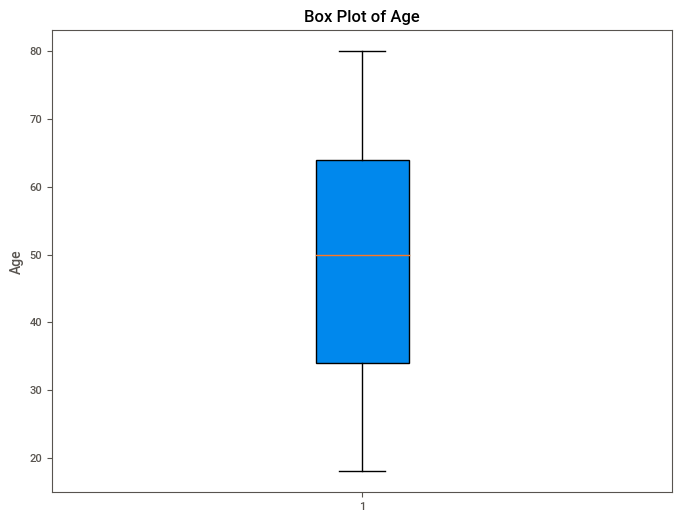

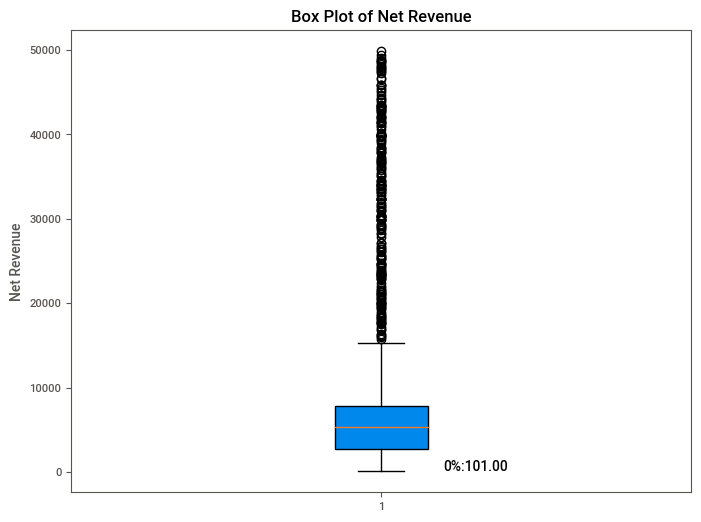

ValueError: Image size of 671x1018945 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 671x1970757 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 671x2892725 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 687x18425349 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Iterate through numerical columns
for column in df.select_dtypes(include=np.number).columns:
# Calculate percentiles
  percentiles = [0, 25, 50, 75, 100]
  percentile_values = np.percentile(df[column], percentiles)
 # Create a box plot
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[column], vert=True, patch_artist=True)
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column)
 # Add percentile labels
for i, percentile in enumerate(percentiles):
 plt.text(1.1, percentile_values[i], f'{percentile}%:{percentile_values[i]:.2f}')
 plt.show()

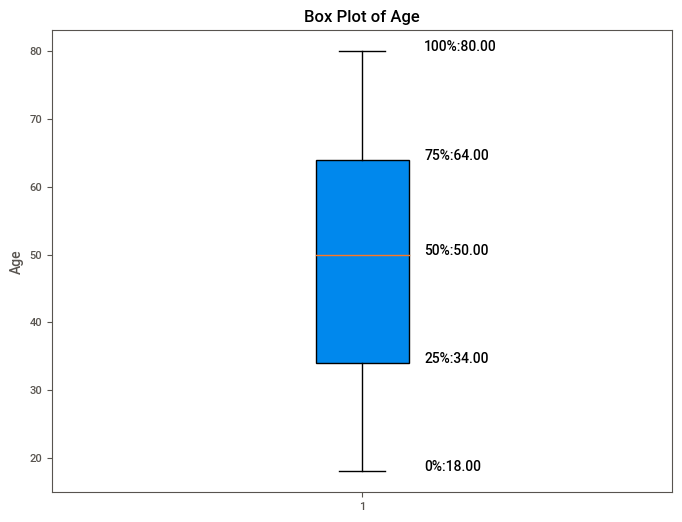

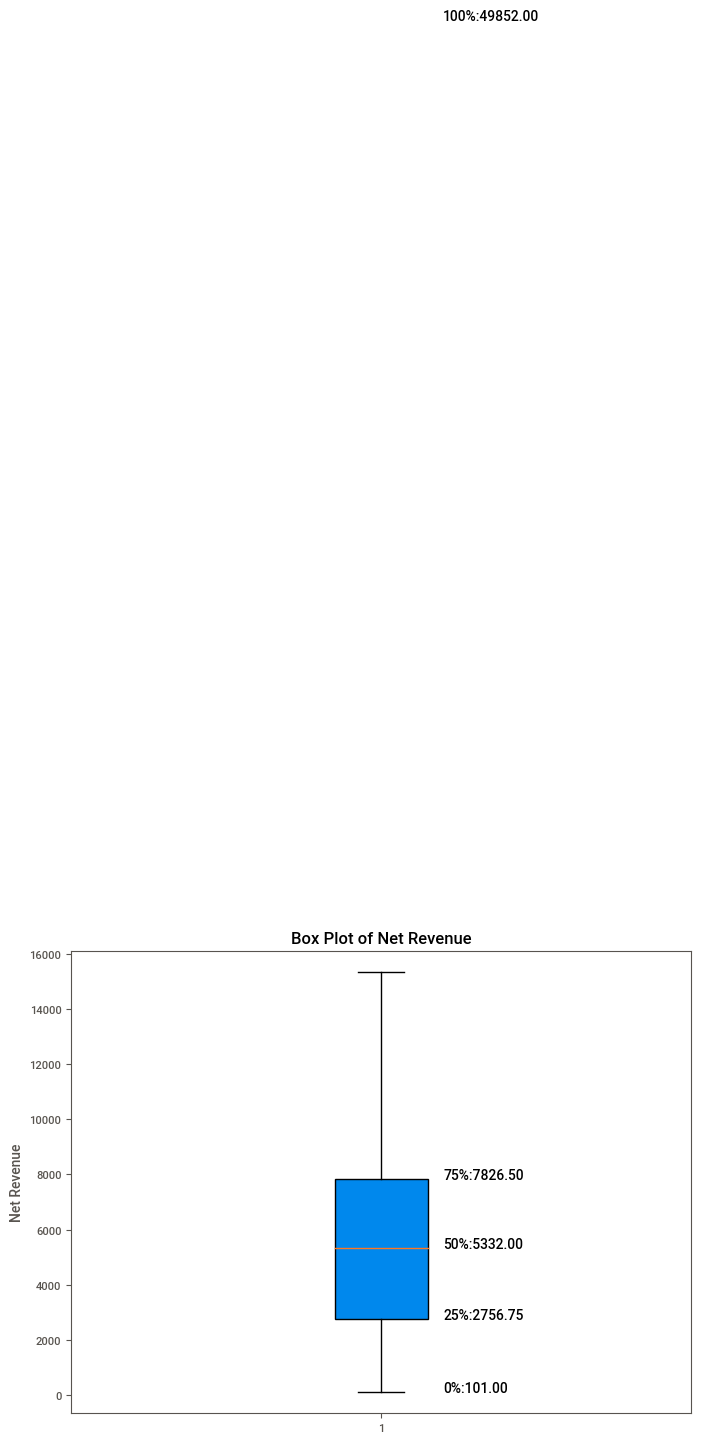

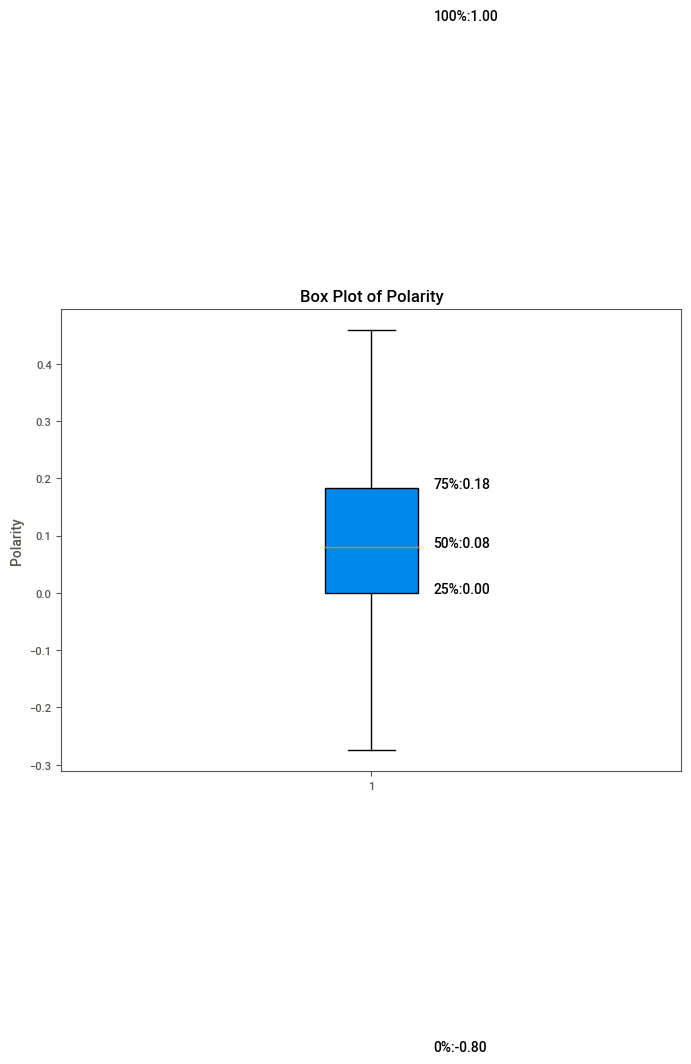

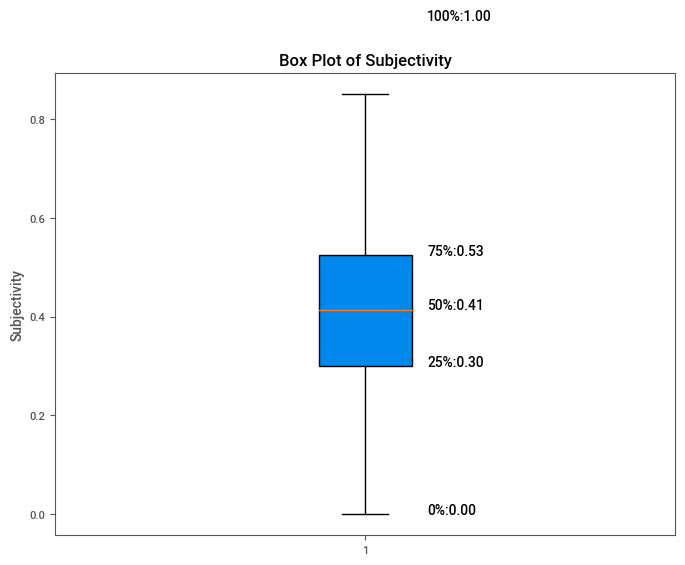

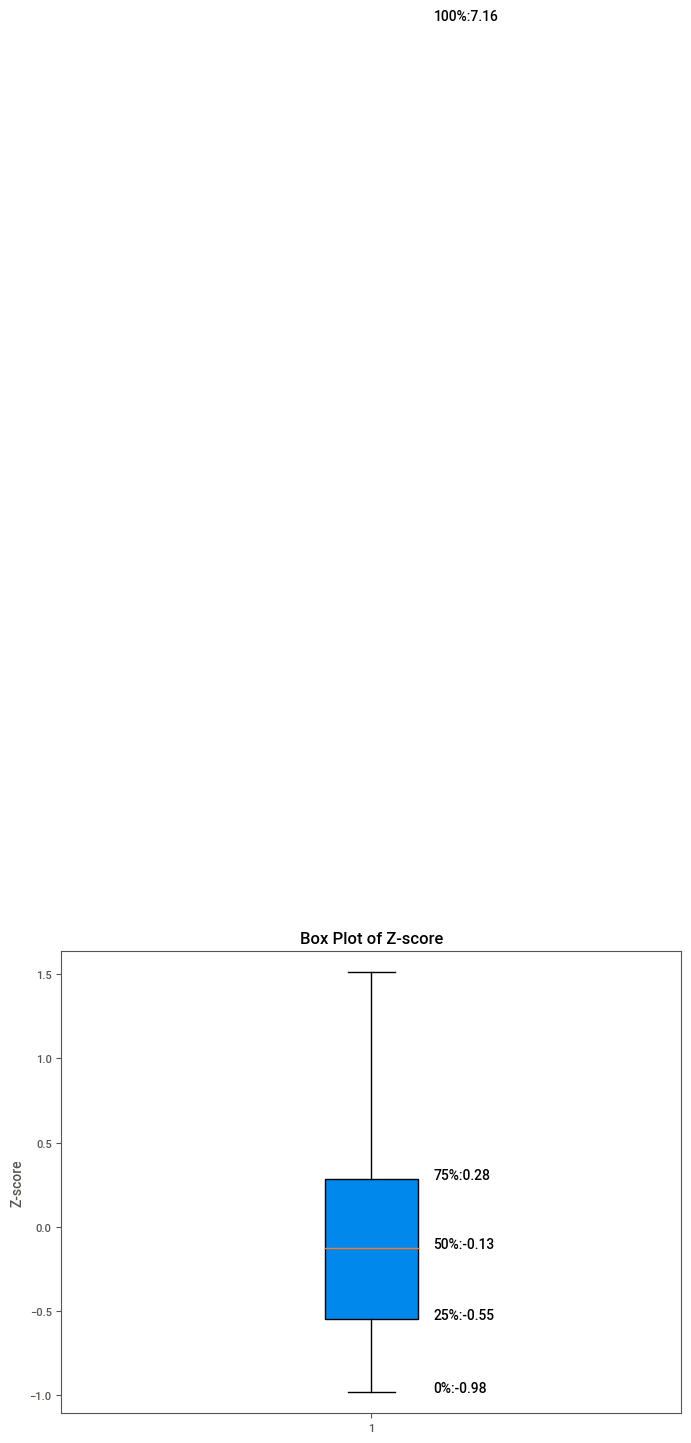

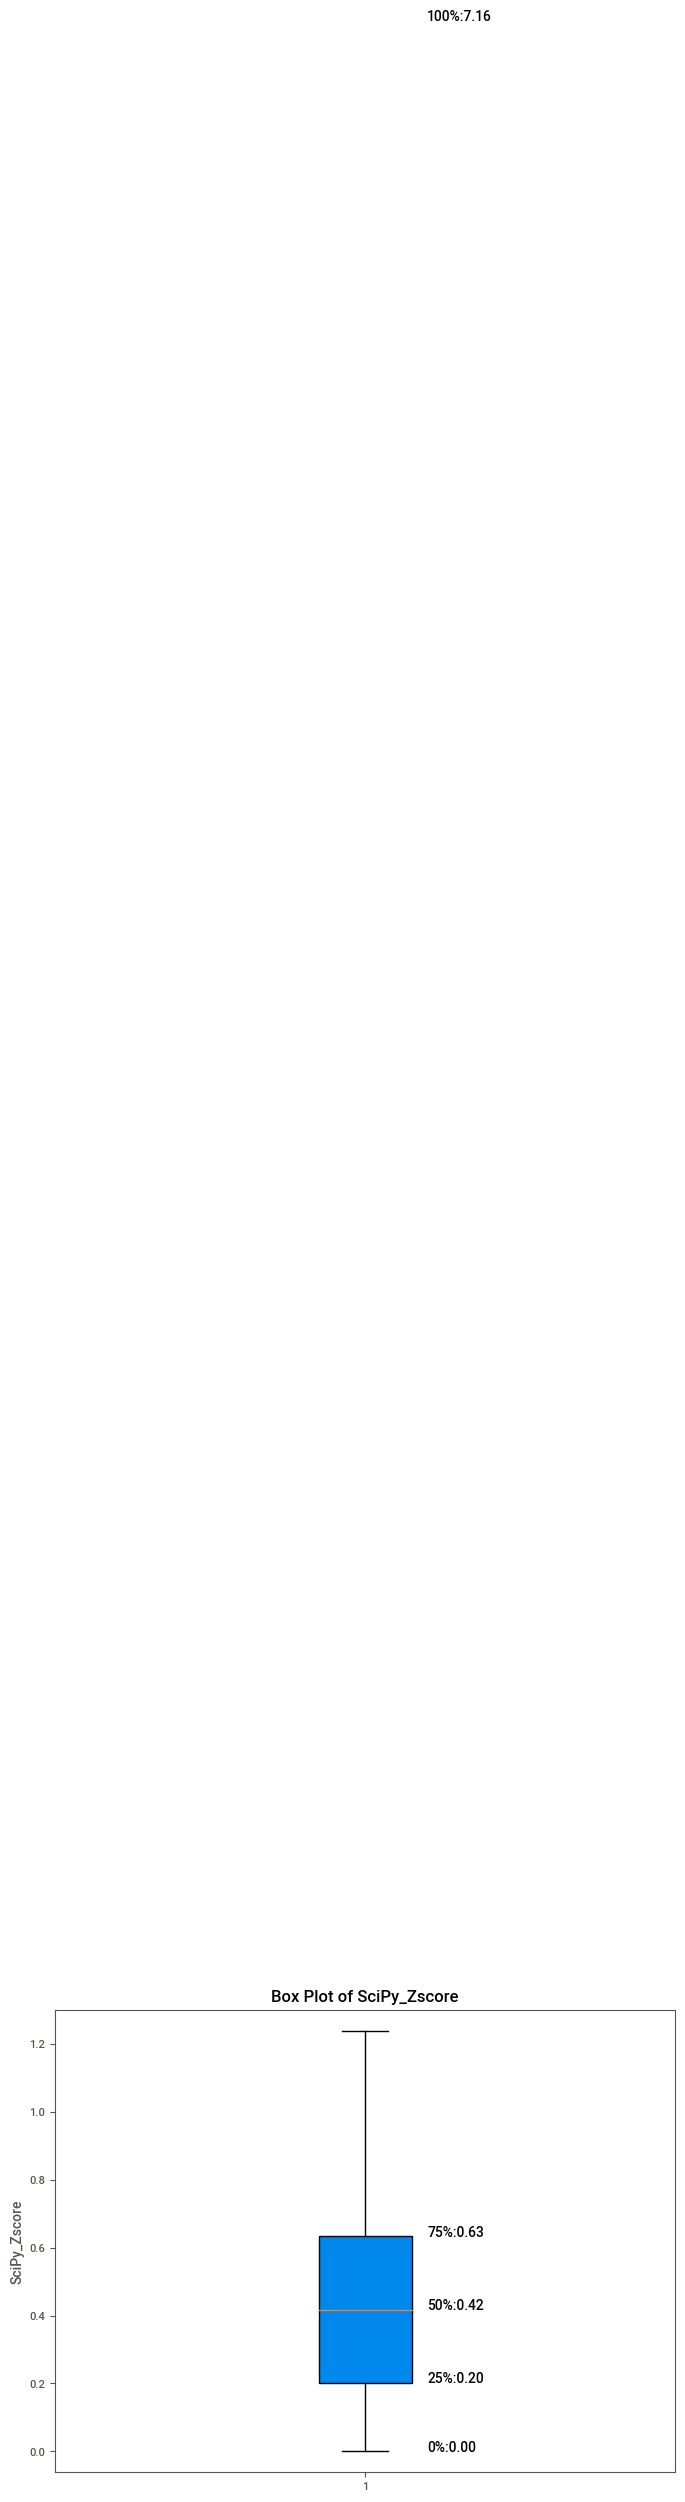

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate through numerical columns
for column in df.select_dtypes(include=np.number).columns:
    # Calculate percentiles
    percentiles = [0, 25, 50, 75, 100]
    percentile_values = np.percentile(df[column], percentiles)

    # Create a box plot
    plt.figure(figsize=(8, 6))

    # Handle outliers by setting 'showfliers' to False or using a custom range
    plt.boxplot(df[column], vert=True, patch_artist=True, showfliers=False)  # Hide outliers
    # Alternatively, set the y-axis limits manually:
    # plt.ylim(percentile_values[0], percentile_values[4])

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    # Add percentile labels
    for i, percentile in enumerate(percentiles):
        plt.text(1.1, percentile_values[i], f'{percentile}%:{percentile_values[i]:.2f}')

    plt.show()

Explore outliers using IQR (Interquartile Range)

In [ ]:
import pandas as pd
import numpy as np

#Calculate the IQR for Net Revenue
Q1 = df['Net Revenue'].quantile(0.25)
Q3 = df['Net Revenue'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bounds for outliers
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

#Create a new column to indicate whether a row is an outlier or not
df['Outlier_IQR'] = np.where((df['Net Revenue'] < lower_bound_iqr) |
 (df['Net Revenue'] > upper_bound_iqr), 'Outlier', 'Not Outlier')

df.to_excel('IQR.xlsx', index=False)

Explore outliers using Z scores using Pandas

In [ ]:
import pandas as pd
import numpy as np
# Calculate the Z-score for Net Revenue
mean = df['Net Revenue'].mean()
std = df['Net Revenue'].std()
df['Z-score'] = (df['Net Revenue'] - mean) / std
# Define the threshold for outliers based on Z-score
threshold = 3

# Create a new column to indicate whether a row is an outlier or not
df['Outlier_Zscore'] = np.where(abs(df['Z-score']) > threshold, 'Outlier', 'Not Outlier')

df.to_excel('zscores.xlsx', index=False)

Explore outliers using Z scores using SciPY

In [ ]:
import numpy as np
from scipy import stats
# Calculate the z-scores for 'Net Revenue'
df['SciPy_Zscore'] = np.abs(stats.zscore(df['Net Revenue']))
# Define a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3
# Identify outliers based on the z-score method
outliers_zscore = df[df['SciPy_Zscore'] > threshold]
# Create a new column to indicate whether a row is an outlier or not
df['Outliers_SpiCy_z'] = np.where(abs(df['SciPy_Zscore']) > threshold, 'Outlier', 'Not Outlier')

df.to_excel('spicy.xlsx', index=False)

Explore column profiles

In [ ]:
# install ydata-profiling - package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations.
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36499e00f98c1bf84d52769788fe5b32a3b9da6415f987292e3cc0c6e06294c4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
# Assuming 'df' is your pandas DataFrame
profile = ProfileReport(df, title="Pandas Profiling Report")
# Generate the report
# profile.to_file("Ydata.html")
# You can also display it in the notebook:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text insights - Explore words using a word cloud

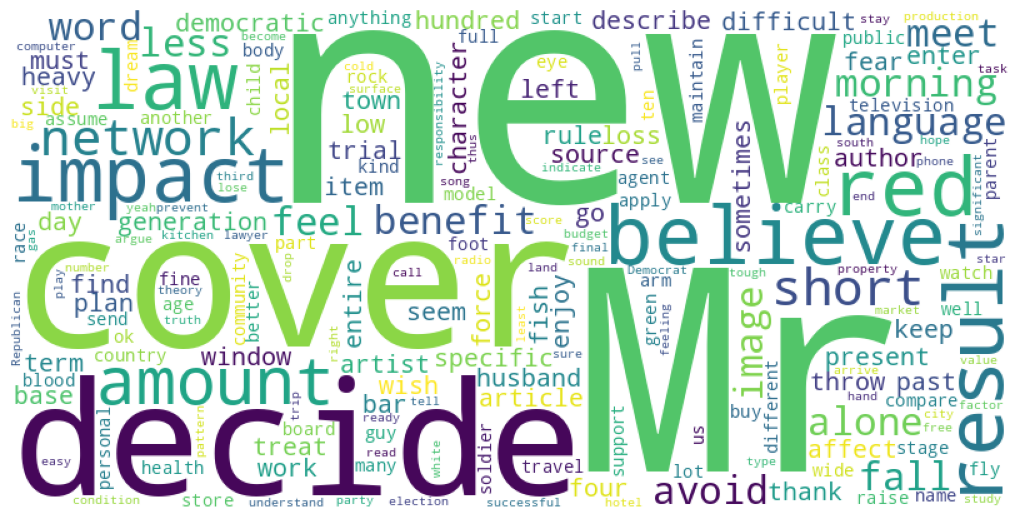

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming 'Feedback' is the column name containing the feedback text
feedback_text = ' '.join(df['Feedback'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Explore feedbacks

In [ ]:
from textblob import TextBlob

def analyze_feedback(feedback):
    analysis = TextBlob(feedback)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Assuming 'Feedback' is the column name containing the feedback text
df['Polarity'], df['Subjectivity'] = zip(*df['Feedback'].apply(analyze_feedback))

def label_feedback(row):
    if row['Polarity'] > 0 and row['Subjectivity'] > 0.5:
        return 'Positive & Subjective'
    elif row['Polarity'] > 0 and row['Subjectivity'] <= 0.5:
        return 'Positive & Objective'
    elif row['Polarity'] == 0 and row['Subjectivity'] > 0.5:
        return 'Neutral & Subjective'
    elif row['Polarity'] == 0 and row['Subjectivity'] <= 0.5:
        return 'Neutral & Objective'
    elif row['Polarity'] < 0 and row['Subjectivity'] > 0.5:
        return 'Negative & Subjective'
    else:
        return 'Negative & Objective'

df['Feedback_Label'] = df.apply(label_feedback, axis=1)



Clustering and forecasting

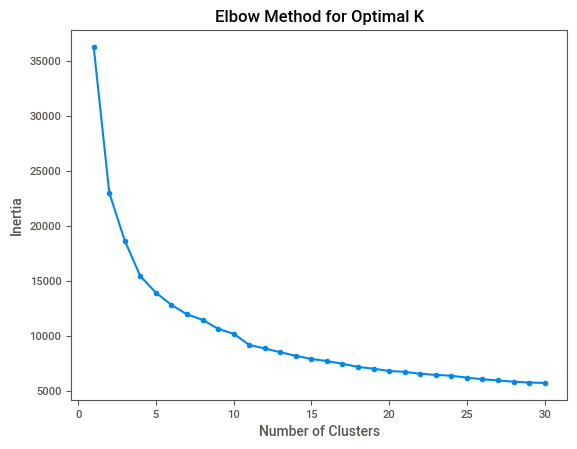

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Select only numerical columns for clustering
numerical_df = df.select_dtypes(include=np.number)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Find the "elbow" point in the plot to determine the optimal number of clusters
# This is a visual inspection, so there might not be a clear elbow
# Choose the number of clusters where the inertia starts to decrease less significantly

# Define the maximum number of clusters to test (change X to your desired value)
max_clusters = 30

inertia = []
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Cluster raw data with Kmeans

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your data (assuming it's in 'Final_work_Njiru.xlsx')
df = pd.read_excel('Final_work_Njiru.xlsx')

# Select numerical features for clustering
# Replace with your actual numerical features if different
numerical_features = ['Age', 'Net Revenue']
X = df[numerical_features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method (optional)
# You can skip this if you already know the desired number of clusters
# ... (Elbow method code, similar to what you have in your notebook)

# Apply KMeans clustering
# Replace 'n_clusters' with your desired number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Analyze the clusters (e.g., calculate cluster statistics, visualize clusters)
# ...

# (Optional) Save the clustered data to a new file
df.to_excel('clustered_data.xlsx', index=False)

Cluster raw data with agglomerativeclustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Cluster using DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

Cluster using gaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture

Forecasting Net revenue for the next 5 years

           Date  Forecasted Revenue
0    2024-10-16         6255.927692
1    2024-10-17         6256.105489
2    2024-10-18         6256.283286
3    2024-10-19         6256.461083
4    2024-10-20         6256.638879
...         ...                 ...
1820 2029-10-10         6579.517907
1821 2029-10-11         6579.695704
1822 2029-10-12         6579.873501
1823 2029-10-13         6580.051298
1824 2029-10-14         6580.229095

[1825 rows x 2 columns]


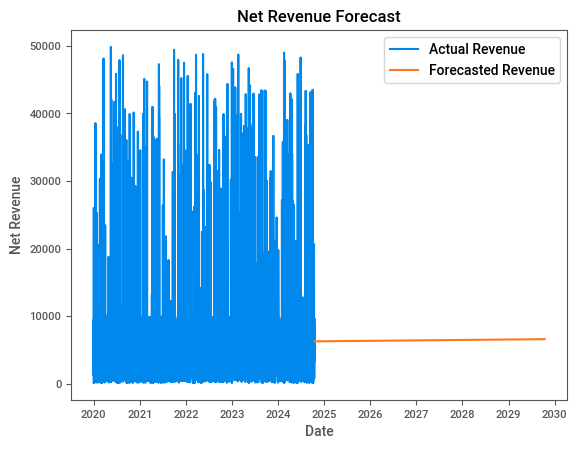

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Assuming 'df' is your DataFrame with a 'Date' column and a 'Net Revenue' column

# 1. Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df = df.sort_values(by=['Date'])  # Sort by date

# 2. Create features for the model (e.g., using days since the first date)
start_date = df['Date'].min()
df['DaysSinceStart'] = (df['Date'] - start_date).dt.days

# 3. Train a Linear Regression model
X = df[['DaysSinceStart']]
y = df['Net Revenue']
model = LinearRegression()
model.fit(X, y)

# 4. Forecast for the next 5 years
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 365 * 5 + 1)]
future_days_since_start = [(date - start_date).days for date in future_dates]
future_X = pd.DataFrame({'DaysSinceStart': future_days_since_start})
forecasted_revenue = model.predict(future_X)

# 5. Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Revenue': forecasted_revenue})

# 6. Print or visualize the forecast
print(forecast_df)

# Optional: Plot the forecast
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Net Revenue'], label='Actual Revenue')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Revenue'], label='Forecasted Revenue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.title('Net Revenue Forecast')
plt.show()

Check if values are unique

In [1]:
import pandas as pd

#df_unnorm = pd.read_excel('/content/raw.xlsx')
df_unnorm = pd.read_excel('Final_work_Njiru.xlsx', sheet_name='Rawdata')
# prompt: rename Net Revenue NetRevenue
df_unnorm = df_unnorm.rename(columns={'Net Revenue': 'NetRevenue'})

# Check for duplicate rows in df_unnorm
duplicate_rows = df_unnorm[df_unnorm.duplicated()]
if df_unnorm.duplicated().any():
    print("DataFrame df_unnorm has duplicate rows.")
else:
    print("DataFrame df_unnorm does not have duplicate rows.")


DataFrame df_unnorm does not have duplicate rows.


Check of there are duplicate

In [2]:
# Check for duplicate values within specific columns
for column in df_unnorm.columns:
 if df_unnorm.duplicated(subset=[column]).any():
     print(f"Column '{column}' has duplicate values.")


Column 'Name' has duplicate values.
Column 'City' has duplicate values.
Column 'Country' has duplicate values.
Column 'Sex' has duplicate values.
Column 'Age' has duplicate values.
Column 'Product' has duplicate values.
Column 'NetRevenue' has duplicate values.
Column 'Date' has duplicate values.


Export the the rawdata to excel

In [3]:
df_unnorm.to_excel('unnorm_raw_data.xlsx', index=False)

Normalising the data into third normal form

In [9]:
import pandas as pd

# Load the Excel file
df_unnorm = pd.read_excel('Final_work_Njiru.xlsx')
df_unnorm = df_unnorm.rename(columns={'Net Revenue': 'NetRevenue'})

# Normalize the data into third normal form (3NF)
# Create separate dataframes for each entity

# Entity: Customers
customers_df = df_unnorm[['Name', 'City', 'Country']].drop_duplicates().reset_index(drop=True)
customers_df['CustomerID'] = customers_df.index + 1

# Entity: Products
products_df = df_unnorm[['Product']].drop_duplicates().reset_index(drop=True)
products_df['ProductID'] = products_df.index + 1

# Entity: Feedbacks
feedbacks_df = df_unnorm[['Feedback']].drop_duplicates().reset_index(drop=True)
feedbacks_df['FeedbackID'] = feedbacks_df.index + 1

# Entity: Transactions
transactions_df = df_unnorm[['Name', 'Product', 'Feedback', 'NetRevenue', 'Date']]
transactions_df = transactions_df.merge(customers_df, on='Name')
transactions_df = transactions_df.merge(products_df, on='Product')
transactions_df = transactions_df.merge(feedbacks_df, on='Feedback')
transactions_df = transactions_df[['CustomerID', 'ProductID', 'FeedbackID', 'NetRevenue', 'Date']]

# Save the normalized data into separate sheets in a new Excel file
with pd.ExcelWriter('normalized_data.xlsx') as writer:
    customers_df.to_excel(writer, sheet_name='Customers', index=False)
    products_df.to_excel(writer, sheet_name='Products', index=False)
    feedbacks_df.to_excel(writer, sheet_name='Feedbacks', index=False)
    transactions_df.to_excel(writer, sheet_name='Transactions', index=False)

print("Data has been normalized and saved to 'normalized_data.xlsx'.")


Data has been normalized and saved to 'normalized_data.xlsx'.


Spliting the tables

In [10]:
# Create a unique ID for products
df_unnorm['ProductID'] = pd.factorize(df_unnorm['Product'])[0] + 1
# Create a unique ID for customers
df_unnorm['CustomerID'] = pd.factorize(df_unnorm['Name'])[0] + 1
# Create the Customer table
customer_df = df_unnorm[['CustomerID', 'Name', 'City', 'Country', 'Sex', 'Age']].drop_duplicates(subset=['CustomerID'])
# Create the Product table (assuming you only have the product name)
product_df = df_unnorm[['ProductID', 'Product']].drop_duplicates(subset=['ProductID'])
# Create the Feedback table
transaction_df = df_unnorm[['CustomerID', 'ProductID', 'Feedback', 'Date', 'NetRevenue']]


Ensure all non-key attributes are fully functionally dependent on the primary key

In [11]:
# Assuming transaction_df is your DataFrame
# Group by 'CustomerID' and 'ProductID' and check if other columns have only one unique value
def are_other_columns_dependent(df):
    for col in df.columns:
        if col not in ['CustomerID', 'ProductID']:
            if df.groupby(['CustomerID', 'ProductID'])[col].nunique().max() > 1:
                return False
    return True

if are_other_columns_dependent(transaction_df):
    print("Other columns in transaction_df are fully dependent on the combination of CustomerID and ProductID.")
else:
    print("Other columns in transaction_df are not fully dependent on the combination of CustomerID and ProductID.")

Other columns in transaction_df are not fully dependent on the combination of CustomerID and ProductID.


Test whether rows are unique, i.e., do not have duplicate values

In [12]:
# If you want to check for duplicates based on specific columns:
# For example, if you want to ensure that each customer only provides one feedback per product
if transaction_df.duplicated(subset=['CustomerID', 'ProductID']).any():
 print("feedback_df has duplicate rows based on CustomerID and ProductID.")
else:
  print("feedback_df does not have duplicate rows based on CustomerID and ProductID.")


feedback_df has duplicate rows based on CustomerID and ProductID.


Export normalised data

In [16]:
# Store the DataFrame to an Excel file with a specific sheet name
# Replace Surname and Sheet
with pd.ExcelWriter('Final_work_Njiru.xlsx', mode='a') as writer:
  customer_df.to_excel(writer, sheet_name='Customers', index=False)
  product_df.to_excel(writer, sheet_name='Products', index=False)
  transaction_df.to_excel(writer, sheet_name='Transactions', index=False)
